# Домашнее задание по обработке текстов

## Предсказание цены акции по экономическим новостям

Входные данные:
* Новости о компании "Газпром", начиная с 2010 года
* Стоимость акций компании "Газпром" на ММВБ, начиная с 2010 года
    * цена открытия (Open)
    * цена закрытия (ClosingPrice)
    * максимальная цена за день (DailyHigh)
    * минимальная цена за день (DailyLow) 
    * объем бумаг (VolumePcs)


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline
%matplotlib inline

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
df = pd.read_csv('texts.csv')
df.head()

,date,text
0,09.11.2017,Компания рассчитывает на решение по газовому с...
1,08.11.2017,"Как и предполагал “Ъ”, «Газпром», воспользова..."
2,01.11.2017,Новая редакция американских санкций ставит по...
3,30.10.2017,"Как стало известно “Ъ”, известный на рынке ри..."
4,23.10.2017,"НОВАТЭК, который через пять лет собирается за..."


In [5]:
pr_all = pd.read_csv('gazprom_prices.csv', sep=';')
pr_all.head(5)

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
0,08.12.2017,"133,43000","132,60000","133,90000","132,00000",16037970
1,07.12.2017,"133,70000","133,02000","133,87000","132,81000",18198430
2,06.12.2017,"133,33000","134,00000","134,29000","132,91000",14641730
3,05.12.2017,"133,48000","133,65000","133,99000","132,78000",12684800
4,04.12.2017,"133,01000","133,77000","134,00000","131,93000",17818980


In [6]:
df['date'] = pd.to_datetime(df.date)
pr_all['Date'] = pd.to_datetime(pr_all.Date)
pr_all['ClosingPrice'] = pr_all.ClosingPrice.apply(lambda x: x.replace(',', '.'))
pr_all['ClosingPrice'] = pd.to_numeric(pr_all.ClosingPrice)
pr_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 6 columns):
Date            1988 non-null datetime64[ns]
Open            1964 non-null object
ClosingPrice    1988 non-null float64
DailyHigh       1986 non-null object
DailyLow        1986 non-null object
VolumePcs       1988 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 93.3+ KB


### Часть 1. Вводная

Проведите предобработку текстов: если считаете нужным, выполните токенизацию, приведение к нижнему регистру, лемматизацию и/или стемминг. Ответьте на следующие вопросы:
* Есть ли корреляция между средней длинной текста за день и ценой закрытия?
* Есть ли корреляция между количеством упоминаний Алексея Миллера  и ценой закрытия? Учтите разные варианты написания имени.
* Упоминаний какого газопровода в статьях больше: 
    * "северный поток"
    * "турецкий поток"?
* О каких санкциях пишут в статьях?

Подготавливаем текст (токенизируем, приводим к нижнему регистру, лемматизируем):

In [7]:
import re
regex = re.compile("[А-Яа-я----]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df['tok_text'] = df.text.str.lower()
df['tok_text'] = df.tok_text.apply(words_only)
df['tok_text'].iloc[0]

'компания рассчитывает на решение по газовому спору с украиной до конца декабря газпром ожидает решения стокгольмского арбитража по транзитному спору с украинским нафтогазом не позднее февраля года хотя раньше компания прогнозировала что это произойдет до ноября решение по взаимным искам об условиях поставок газа на украину по мнению монополии суд может принять на месяц раньше до декабря года'

In [8]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'из-за' , 'также',  'г', '-', '-']# - ['не', 'нет']
print(len(mystopwords))
mystopwords.remove('не')
mystopwords.remove('нет')
print(len(mystopwords))

157
155


In [9]:
print(mystopwords)
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
df.tok_text = df.tok_text.apply(remove_stopwords)   
df['tok_text'].iloc[0]

['и', 'в', 'во', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем', 'хорош

'компания рассчитывает решение газовому спору украиной конца декабря газпром ожидает решения стокгольмского арбитража транзитному спору украинским нафтогазом не позднее февраля года хотя раньше компания прогнозировала произойдет ноября решение взаимным искам условиях поставок газа украину мнению монополии суд принять месяц раньше декабря года'

In [10]:
from nltk import FreqDist
n_types = []
n_tokens = []
tokens = []
fd = FreqDist()
for index, row in df.iterrows():
    tokens = row['tok_text'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))
for i in fd.most_common(50):
    print(i)

('газпром', 2552)
('не', 1033)
('газа', 961)
('млрд', 906)
('компании', 703)
('руб', 596)
('газпрома', 556)
('нефть', 449)
('компания', 400)
('млн', 373)
('нефти', 357)
('года', 329)
('газ', 327)
('сообщил', 309)
('ъ', 299)
('оао', 256)
('россии', 245)
('говорится', 210)
('году', 208)
('газпромбанк', 202)
('российского', 195)
('сказал', 192)
('украины', 186)
('кубометров', 179)
('газпром-медиа', 179)
('монополии', 175)
('поставок', 172)
('поставки', 160)
('который', 159)
('пока', 159)
('правления', 158)
('спг', 154)
('монополия', 153)
('рынке', 153)
('заявил', 150)
('год', 149)
('роснефть', 149)
('газопровода', 149)
('цены', 142)
('проекта', 141)
('месторождения', 139)
('акций', 138)
('проект', 138)
('могут', 137)
('сообщении', 135)
('директоров', 126)
('алексей', 126)
('александр', 122)
('м', 122)
('миллер', 121)


In [11]:
%%time 
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

df['lem_text'] = df.tok_text.apply(lemmatize)

Wall time: 40min 6s


In [12]:
df['lem_text'].iloc[0]

'компания рассчитывать решение газовый спор украина конец декабрь газпром ожидать решение стокгольмский арбитраж транзитный спор украинский нафтогаз не поздно февраль год хотя рано компания прогнозировать происходить ноябрь решение взаимный иск условие поставка газ украина мнение монополия суд принимать месяц рано декабрь год'

In [13]:
df.to_csv('lem_df.csv', sep='|', encoding='utf-8')

In [14]:
m.close

<bound method Mystem.close of <pymystem3.mystem.Mystem object at 0x000001C6E4DCB438>>

In [15]:
#df = pd.read_csv('lem_df.csv', sep='|', encoding='utf-8')
#df['date'] = pd.to_datetime(df.date)

In [16]:
df['text_len'] = df.text.apply(len)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 5 columns):
date        1203 non-null datetime64[ns]
text        1203 non-null object
tok_text    1203 non-null object
lem_text    1203 non-null object
text_len    1203 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 47.1+ KB


Есть ли корреляция между средней длинной текста за день и ценой закрытия?

In [17]:
pr_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 6 columns):
Date            1988 non-null datetime64[ns]
Open            1964 non-null object
ClosingPrice    1988 non-null float64
DailyHigh       1986 non-null object
DailyLow        1986 non-null object
VolumePcs       1988 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 93.3+ KB


In [18]:
df1 = df[['date', 'text_len']].groupby('date').mean().reset_index()
df1 = df1.join(pr_all[['Date', 'ClosingPrice']].set_index('Date'), on='date')
df1.drop(['date'], axis = 1, inplace=True)
#df1.head()

In [19]:
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 1202
Data columns (total 2 columns):
text_len        1159 non-null int64
ClosingPrice    1159 non-null float64
dtypes: float64(1), int64(1)
memory usage: 27.2 KB


Корреляция между средней длинной текста за день и ценой закрытия отсутствует
pearson correlation = 0.0142


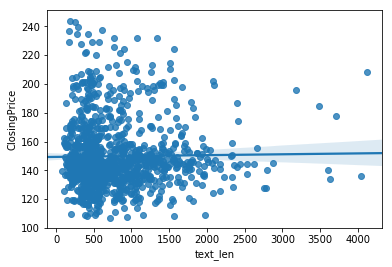

In [20]:
sns.regplot(df1.text_len, df1.ClosingPrice)
print('Корреляция между средней длинной текста за день и ценой закрытия отсутствует\n\
pearson correlation = {:.4f}'.format(df1.corr().text_len.min()))

Есть ли корреляция между количеством упоминаний Алексея Миллера и ценой закрытия?

In [21]:
df['miller'] = df.lem_text.str.count('миллер')
df.miller.value_counts()

0    1101
1      71
2      20
3       7
4       2
6       1
5       1
Name: miller, dtype: int64

In [22]:
df1 = df[['date', 'miller']].groupby('date').mean().reset_index()
df1 = df1.join(pr_all[['Date', 'ClosingPrice']].set_index('Date'), on='date')
df1.drop(['date'], axis = 1, inplace=True)
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 1202
Data columns (total 2 columns):
miller          1159 non-null int64
ClosingPrice    1159 non-null float64
dtypes: float64(1), int64(1)
memory usage: 27.2 KB


Корреляция между количеством упоминаний Алексея Миллера и ценой закрытия отсутствует
pearson correlation = 0.0106


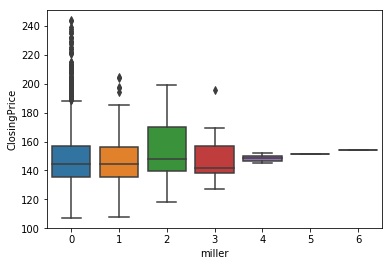

In [23]:
sns.boxplot(df1.miller, df1.ClosingPrice)
print('Корреляция между количеством упоминаний Алексея Миллера и ценой закрытия отсутствует\n\
pearson correlation = {:.4f}'.format(df1.corr().miller.min()))

Упоминаний какого газопровода в статьях больше:
"северный поток" или
"турецкий поток"?

In [24]:
print('Северный поток упоминается в {} новостях'.format(df.lem_text.str.contains('северный поток').sum()))
print('Турецкий поток упоминается в {} новостях'.format(df.lem_text.str.contains('турецкий поток').sum()))
print('Турецкий поток упоминается чаще')

Северный поток упоминается в 12 новостях
Турецкий поток упоминается в 34 новостях
Турецкий поток упоминается чаще


О каких санкциях пишут в статьях?

In [25]:
#очищаю текст от английских слов для корректной работы syntax_net
import re
regex = re.compile("[^$A-Za-z]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))

In [26]:
#df.loc[df.lem_text.str.contains('санкция')]['text'].to_csv('data/news.txt', sep='\n', index=False, encoding='utf-8')
df_sanc = df.loc[df.lem_text.str.contains('санкция')]['text'].copy()
text=''
for news in df_sanc:
    text += news
print(len(text))
text = words_only(text)
print(len(text))

42932
42429


In [27]:
from nltk.tokenize import sent_tokenize

sents = sent_tokenize(text)

thefile = open('data/news.txt', 'w', encoding='utf-8')
i = 0
for item in sents:
    if 'санкц' in item:
        thefile.write("%s\n" % item)
        i += 1
thefile.close()
print(len(sents))
print(i)

328
68


In [28]:
# запустил docker на виртуалке
#! cat data/news.txt | docker run --rm -i inemo/syntaxnet_rus > data.conll
# для корректного выполнения следующего кода в полном объеме, пришлось удалить три предложения. В чем проблема с ними - не понял.
# в результате пропала пара "антироссийские санкции"

In [29]:
from nltk import DependencyGraph
import codecs

processed_sentences = []
sentence = []
for line in codecs.open('data.conll', 'r', 'utf-8'):
    if len(line) == 1:
        processed_sentences.append(sentence)
        sentence = []
    else:
        word = line.split("\t")
        sentence.append(word)

deps = []
for sentence in processed_sentences:
    s = u""
    for line in sentence:
        s += u"\t".join(line) + u'\n'
    deps.append(s)

for sent_dep in deps:
    graph = DependencyGraph(tree_str=sent_dep)
#    for triple in graph.triples():
#        if triple:
#            print(triple)
    tree = graph.tree()
#    print(tree.pretty_print())

In [30]:
for sent_dep in deps:
    graph = DependencyGraph(tree_str=sent_dep)
    for triple in graph.triples():
        if triple:
            if ('санкц' in triple[0][0]) & (triple[1] == 'amod'):
                print(triple[0][0], triple[2][0])

санкций американских
санкций, западных
санкций введенных
санкций западных
санкций. очередных
санкции западные
санкциями введенными
санкциями экономическими
санкции персональные
санкциями, затронутых
санкции штрафные
санкций западных
санкций западных
санкций секторальных
санкций секторальных
санкций западных
санкции. западные
санкций, введенных
санкций, введенных
санкции, визовые
санкции,— международные
санкции,— международные
санкций штрафных


## Часть 2. Классификационная
Вам предстоит решить следующую задачу: по текстам новостей за день определить, вырастет или понизится цена закрытия.
Для этого:
* бинаризуйте признак "цена закрытия":  новый признак ClosingPrice_bin равен 1, если по сравнению со вчера цена не упала, и 0 – в обратном случаея;
* составьте бучающее и тестовое множество: данные до начала 2016 года используются для обучения, данные с 2016 года и позже – для тестирования.

Таким образом, в каждлый момент времени мы знаем: 
* ClosingPrice_bin – бинарый целевой признак
* слова из статей, опубликованных в этот день – объясняющие признаки

В этой части задания вам нужно сделать baseline алгоритм и попытаться его улучшить в следующей части. 

Используйте любой известный вам алгоритм классификации текстов для того, Используйте $tf-idf$ преобразование, сингулярное разложение, нормировку признакого пространства и любые другие техники обработки данных, которые вы считаете нужным. Используйте accuracy и F-measure для оценки качества классификации. Покажите, как  $tf-idf$ преобразование или сингулярное разложение или любая другая использованная вами техника влияет на качество классификации.
Если у выбранного вами алгоритма есть гиперпараметры (например, $\alpha$ в преобразовании Лапласа для метода наивного Байеса), покажите, как изменение гиперпараметра влияет на качество классификации.

In [31]:
pr1 = pr_all.sort_values('Date', axis=0).reset_index()
pr2 = pr1.drop(0, axis=0).reset_index()
pr1 = pr1.drop(len(pr1)-1, axis=0).reset_index()

In [32]:
pr_all.sort_values('Date', axis=0, inplace=True)
pr_all.reset_index(inplace=True)
pr_all_bin = pr_all.drop(0, axis=0).reset_index()
cl_price = pr2['ClosingPrice'] - pr1['ClosingPrice']
pr_all_bin['ClosingPrice_bin'] = cl_price
pr_all_bin.tail()

,level_0,index,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs,ClosingPrice_bin
1982,1983,167,2017-12-04,"127,05000",125.05,"127,45000","124,62000",28978480,-32.20
1983,1984,148,2017-12-05,"131,41000",132.50,"132,50000","130,20000",23895330,7.45
1984,1985,106,2017-12-07,NaN,124.87,"125,19000","124,21000",22746970,-7.63
1985,1986,62,2017-12-09,"121,29000",121.99,"122,00000","120,16000",27281490,-2.88
1986,1987,40,2017-12-10,"126,05000",125.93,"126,79000","125,45000",18077300,3.94


In [33]:
pr_all_bin['ClosingPrice_bin'] = [ 1 if x >= 0 else 0 for x in pr_all_bin['ClosingPrice_bin'] ]

In [34]:
df['date'].value_counts().max()

1

In [35]:
X = df[['date', 'lem_text']].sort_values('date').reset_index()
X.drop('index', axis = 1, inplace=True)
X = X.join(pr_all_bin[['Date', 'ClosingPrice_bin']].set_index('Date'), on='date')
X.dropna(inplace=True)
X.shape

(1158, 3)

In [36]:
#составьте бучающее и тестовое множество: данные до начала 2016 года используются для обучения, 
#данные с 2016 года и позже – для тестирования.
X_train = X[X.date <= pd.datetime(2015, 12, 31)]['lem_text']
y_train = X[X.date <= pd.datetime(2015, 12, 31)]['ClosingPrice_bin']
print(X_train.shape, y_train.shape)

(900,) (900,)


In [37]:
X_test = X[X.date > pd.datetime(2015, 12, 31)]['lem_text']
y_test = X[X.date > pd.datetime(2015, 12, 31)]['ClosingPrice_bin']
print(X_test.shape, y_test.shape)

(258,) (258,)


In [60]:
#с помощью gridsearch выбираю лучшую модель
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

text_clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])

NGRAM_RANGE = [(1, 1), (1, 2), (2, 2)]
ALPHA = [0.05, 0.1, 0.2, 0.5, 1, 1.25, 1.5, 2]
MIN_DF_RANGE = [0.01, 0.02, 0.03]
MAX_DF_RANGE = [0.10, 0.15, 0.20]
USE_IDF = [True, False]
C_OPTIONS = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
N_ESTIMATORS = [10, 100, 200, 300]

param_grid = [
    {
        'clf': [MultinomialNB()],
        'vect__ngram_range': NGRAM_RANGE,
        'vect__min_df': MIN_DF_RANGE,
        'vect__max_df': MAX_DF_RANGE,
        'clf__alpha': ALPHA,
        'tfidf__use_idf': USE_IDF
    },
    {
        'clf': [RandomForestClassifier()],
        'vect__ngram_range': NGRAM_RANGE,
        'vect__min_df': MIN_DF_RANGE,
        'vect__max_df': MAX_DF_RANGE,
        'clf__n_estimators': N_ESTIMATORS,
        'tfidf__use_idf': USE_IDF
    },
    {
        'clf': [LogisticRegression(), LinearSVC()],
        'vect__ngram_range': NGRAM_RANGE,
        'vect__min_df': MIN_DF_RANGE,
        'vect__max_df': MAX_DF_RANGE,
        'clf__C': C_OPTIONS,
        'tfidf__use_idf': USE_IDF
    },
]

grid = GridSearchCV(text_clf, cv=4, n_jobs=-1, param_grid=param_grid, verbose=10)

In [61]:
grid.fit(X_train, y_train)

Fitting 4 folds for each of 1404 candidates, totalling 5616 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Paralle

GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'clf': [MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)], 'vect__ngram_range': [(1, 1), (1, 2), (2, 2)], 'vect__min_df': [0.01, 0.02, 0.03], 'vect__max_df': [0.1, 0.15, 0.2], 'clf__alpha': [0.05, 0.1, 0.2, 0.5, 1, 1.25, 1.5, 2], 'tfidf__use_idf': [True, False]}, {'clf': [Ran... [0.1, 0.15, 0.2], 'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'tfidf__use_idf': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_tr

In [64]:
print(grid.best_estimator_.steps[0])

('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.2, max_features=None, min_df=0.02,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None))


In [65]:
#лучшая модель:
text_clf = Pipeline([('vect', CountVectorizer(max_df=0.2, min_df=0.02, ngram_range=(1,1))), 
                     ('tfidf', TfidfTransformer(use_idf=True)), 
#                     ('clf', RandomForestClassifier(n_estimators=10))])
                     ('clf', MultinomialNB(alpha=0.05))])

In [66]:
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)

In [67]:
from sklearn.metrics import *
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}'.format(micro_f1))
print('macro F1={0:1.4f}'.format(macro_f1))

acc=0.5233
micro F1=0.5233
macro F1=0.4988


In [68]:
#без tfidf предсказания хуже:
text_clf = Pipeline([('vect', CountVectorizer(max_df=0.2, min_df=0.02, ngram_range=(1,1))),  
                     ('clf', MultinomialNB(alpha=0.05))])

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)

acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}'.format(micro_f1))
print('macro F1={0:1.4f}'.format(macro_f1))

acc=0.5039
micro F1=0.5039
macro F1=0.4904


In [45]:
#исследую влияние гиперпараметра alpha на accuracy
text_clf = Pipeline([('vect', CountVectorizer(max_df=0.2, min_df=0.02, ngram_range=(1,1))), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])

ALPHA = np.arange(0.01, 2, 0.01)

param_grid = [
    {
        'clf': [MultinomialNB()],
        'clf__alpha': ALPHA,
    }
]

grid = GridSearchCV(text_clf, cv=4, n_jobs=-1, param_grid=param_grid, verbose=10)
grid.fit(X_train, y_train)

Fitting 4 folds for each of 199 candidates, totalling 796 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Paralle

GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.2, max_features=None, min_df=0.02,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'clf': [MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)], 'clf__alpha': array([ 0.01,  0.02, ...,  1.98,  1.99])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

C:\Users\mershov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


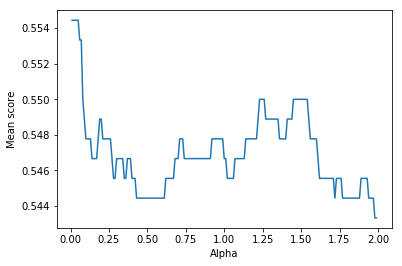

In [46]:
import matplotlib.pyplot as plt
scores = [x[1] for x in grid.grid_scores_]

plt.plot(ALPHA, scores)
plt.xlabel('Alpha')
plt.ylabel('Mean score')
plt.show()

## Часть 3. Творческая
Придумайте и попытайтесь сделать еще что-нибудь, чтобы улучшить качество классификации. 
Направления развития:
* Морфологический признаки: 
    * использовать в качестве признаков только существительные или только именованные сущности;
* Модели скрытых тем:
    * использовать в качестве признаков скрытые темы;
    * использовать в качестве признаков динамические скрытые темы 
    пример тут: (https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/dtm_example.ipynb)
* Синтаксические признаки:
    * использовать SOV-тройки в качестве признаков
    * кластеризовать SOV-тройки по эмбеддингам глаголов (обученные word2vec модели можно скачать отсюда: (http://rusvectores.org/ru/models/) и использовать только центроиды кластеров в качестве признаков
* что-нибудь еще     